In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np
from IPython.display import Image
from sklearn.tree import export_graphviz

In [2]:
iris = load_iris()
iris.feature_names=['Longueur Sépale (cm)', 'Largeur Sépale (cm)', 'Longueur Pétale (cm)', 'Largeur Pétale (cm)']
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Longueur Sépale (cm): 11%
Largeur Sépale (cm): 2%
Longueur Pétale (cm): 44%
Largeur Pétale (cm): 42%


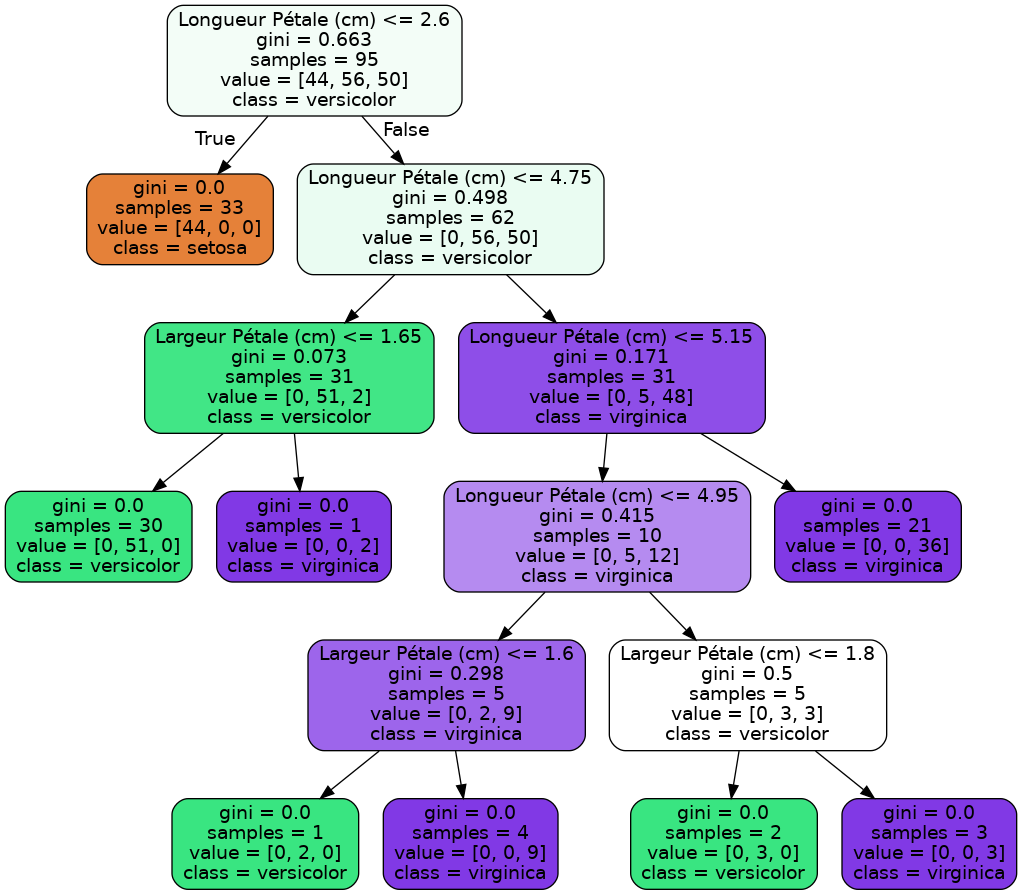

In [3]:
export_graphviz(
    rnd_clf.estimators_[np.random.randint(rnd_clf.n_estimators)],
    out_file="iris_tree.dot",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
#appel à la fonction dot de graphwiz
os.system("dot -Tpng iris_tree.dot -o iris_tree.png")
#Affichage de l'image créée
Image("iris_tree.png")
